In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
ask = pd.read_csv('data/EURUSD_Candlestick_4_Hour_ASK_01.10.2019-31.10.2019.csv')
bid = pd.read_csv('data/EURUSD_Candlestick_4_Hour_BID_01.10.2019-31.10.2019.csv')
ask = ask.set_index("Gmt time")
bid = bid.set_index("Gmt time")
oa = ask['Open']
ob = bid['Open']

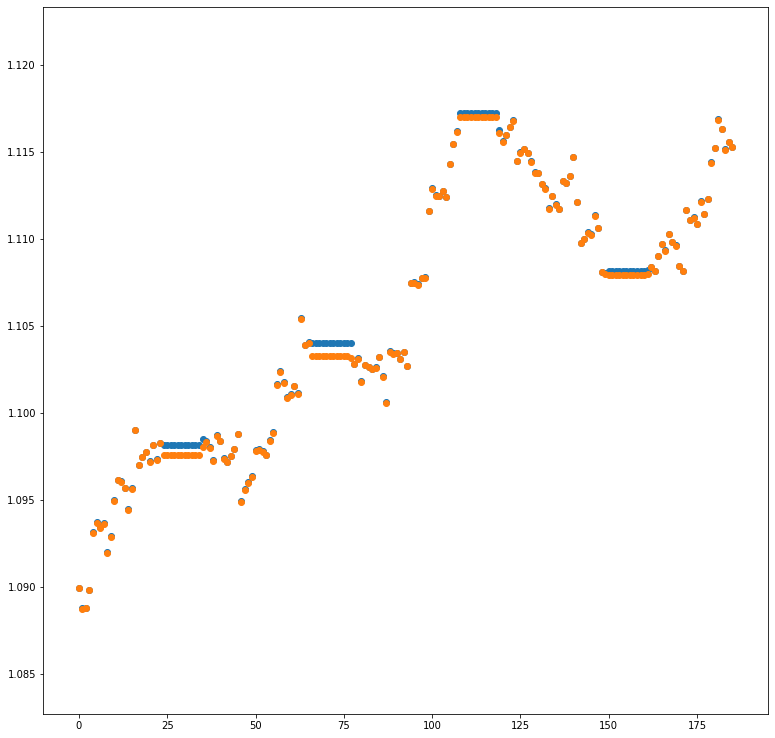

In [33]:
plt.figure(figsize=(13, 13))
plt.scatter(range(len(oa)), oa)
plt.scatter(range(len(ob)), ob)

In [52]:
ask["Open"]["01.10.2019 04:00:00.000"]

1.0888

In [131]:
MONEY = 100000
POINTS = 0

In [96]:
def reset():
    global MONEY, POINTS
    MONEY = 100000
    POINTS = 0

In [120]:
def long(datetime, point, leverage):
    global MONEY, POINTS
    
    current_bid = ask['Open'][datetime]
    print("current_bid:", current_bid)
    price = current_bid * point / leverage
    
    POINTS += point
    MONEY -= price
    
    print("買入 {} 單位 EURUSD，費用 {} 美元（槓桿X{}）".format(point, price, leverage))
    print("目前可用 {} 美元、擁有 {} 單位 EURUSD，總資產 {} 美元，".format(MONEY, POINTS, MONEY+price))
    
    return (MONEY, POINTS)

In [113]:
datetime = np.random.choice(ask.index)

In [128]:
reset()

In [130]:
long(datetime, 1000, 10)

current_bid: 1.11723
買入 1000 單位 EURUSD，費用 111.723 美元（槓桿X10）
目前可用 99776.554 美元、擁有 2000 單位 EURUSD，總資產 99888.277 美元，


(99776.554, 2000)

In [159]:
class State:
    def __init__(self):
        self.MONEY = 10000
        self.POINTS = 0
        self.transaction = []
        
    def reset(self):
        self.MONEY = 10000
        self.POINTS = 0
        
    def show(self):
        print(self.MONEY, self.POINTS)
        
    def long(self, datetime, point, leverage=10):
        current_bid = ask['Open'][datetime]
        print("current_bid:", current_bid)
        price = current_bid * point / leverage

        self.POINTS += point
        self.MONEY -= price
        self.transaction.append([current_bid, price, point, self.MONEY, self.POINTS])

        print("買入 {} 單位 EURUSD，費用 {} 美元（槓桿X{}）".format(point, price, leverage))
        print("目前可用 {} 美元、擁有 {} 單位 EURUSD，總資產 {} 美元，".format(self.MONEY, self.POINTS, self.MONEY+price))
        
        
        observation = (self.MONEY, self.POINTS)
        reward = 0
        done = False
        info = None
        
        return [observation, reward, done, info]
    
    def take_action(self, action):
        pass

In [160]:
investment = State()

In [161]:
investment.show()

10000 0


In [162]:
investment.reset()

In [163]:
investment.long(datetime, 10000)

current_bid: 1.11723
買入 10000 單位 EURUSD，費用 1117.23 美元（槓桿X10）
目前可用 8882.77 美元、擁有 10000 單位 EURUSD，總資產 10000.0 美元，


[(8882.77, 10000), 0, False, None]